In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from pathlib import Path

In [2]:
rcParams.update({"font.size": 6})
rcParams["svg.fonttype"] = "none"

Loading the tabular data (.json files):

In [3]:
# TO DO: Specify path to structured data
data_dir = Path("../Hancock_Dataset/StructuredData")

In [4]:
clinical = pd.read_json(data_dir/"clinical_data.json", dtype={"patient_id": str})
patho = pd.read_json(data_dir/"pathological_data.json", dtype={"patient_id": str})
blood = pd.read_json(data_dir/"blood_data.json", dtype={"patient_id": str})
ref = pd.read_json(data_dir/"blood_data_reference_ranges.json").drop(["LOINC_name"], axis=1)

## Demographics

### Smoking status

In [5]:
smoking_counts = clinical['smoking_status'].value_counts()
smoking_counts

smoking_status
smoker        350
non-smoker    211
former        186
Name: count, dtype: int64

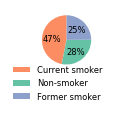

In [6]:
plt.figure(figsize=(0.8,0.8))
plt.pie(smoking_counts,
        colors=[sns.color_palette("Set2")[1],sns.color_palette("Set2")[0],sns.color_palette("Set2")[2]],
        autopct='%.0f%%',
        startangle=90,
        textprops={'fontsize':"6"})
circle = plt.Circle((0,0), 0.4, color='white')
p = plt.gcf()
# p.gca().add_artist(circle)
plt.legend(["Current smoker", "Non-smoker", "Former smoker"],
           loc='center right',
           bbox_to_anchor=(1.2, -0.2),
           frameon=False)
plt.show()

### Sex

In [7]:
sex_counts = clinical['sex'].value_counts()
sex_counts

sex
male      614
female    149
Name: count, dtype: int64

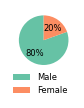

In [8]:
plt.figure(figsize=(0.8,0.86))
plt.pie(sex_counts,
        colors=sns.color_palette("Set2"),
        autopct='%.0f%%',
        startangle=90,
        textprops={'fontsize':"6"})
circle = plt.Circle((0,0), 0.4, color='white')
p = plt.gcf()
# p.gca().add_artist(circle)
plt.legend(["Male", "Female"],
           loc='center right',
           bbox_to_anchor=(1, -0.2),
           frameon=False)
plt.show()

### Age

In [9]:
age = clinical["age_at_initial_diagnosis"]
bins = np.arange(clinical["age_at_initial_diagnosis"].min(), clinical["age_at_initial_diagnosis"].max()+1, 5)

In [10]:
age.median()

61.0

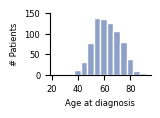

In [11]:
plt.figure(figsize=(1.3,0.8))
plt.hist(age, bins=bins, edgecolor="white", color=sns.color_palette("Set2")[2])
sns.despine()
plt.ylim([0,150])
plt.xlabel("Age at diagnosis", fontsize=6)
plt.ylabel("# Patients", fontsize=6)
plt.show()

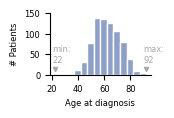

In [12]:
plt.figure(figsize=(1.3,0.8))
plt.hist(age, bins=bins, edgecolor="white", color=sns.color_palette("Set2")[2])
sns.despine()
plt.ylim([0,150])
plt.xlabel("Age at diagnosis", fontsize=6)
plt.ylabel("# Patients", fontsize=6)
plt.plot(age.min(), 15, "v", color="darkgray", markersize=3)
plt.plot(age.max(), 15, "v", color="darkgray", markersize=3)
plt.text(s=f"min:\n{age.min()}", x=20, y=30, color="darkgray")
plt.text(s=f"max:\n{age.max()}", x=90, y=30, color="darkgray")
plt.savefig("test.svg", bbox_inches="tight")
plt.show()

## Pathological data

### Primary tumor site

In [13]:
site = patho["primary_tumor_site"].value_counts().sort_values()
site.index = site.index.str.replace('_', ' ')
site

primary_tumor_site
CUP              2
Hypopharynx     89
Oral Cavity    134
Larynx         207
Oropharynx     331
Name: count, dtype: int64

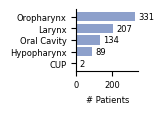

In [14]:
plt.figure(figsize=(0.8, 0.8))
# color = list(reversed(sns.color_palette("Set2")[0:4]))
color = sns.color_palette("Set2")[2]
ax = plt.barh(site.index, site.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.show()

### Staging

In [15]:
tstage = patho["pT_stage"].replace({"pT4a": "pT4", "pT4b": "pT4", "pT1a": "pT1", "pT1b": "pT1"}).value_counts().sort_values()
tstage = tstage.sort_values(ascending=True)

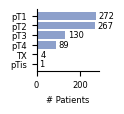

In [16]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(tstage.index, tstage.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.show()

In [17]:
nstage = patho["pN_stage"].apply(lambda x: "xNX" if x=="NX" else str(x)[:3]).value_counts().sort_values()
nstage = nstage.sort_index(ascending=False)

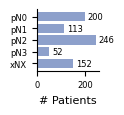

In [18]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(nstage.index, nstage.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=8)
plt.show()

### Grading

In [19]:
grading = patho.grading.replace("hpv_association_p16", "HPV+").value_counts()[["HPV+", "G3", "G2", "G1"]]
grading

grading
HPV+    141
G3      370
G2      236
G1       16
Name: count, dtype: int64

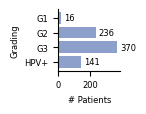

In [20]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(grading.index, grading.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Grading", fontsize=6)
plt.show()

### Tumor infiltration depth

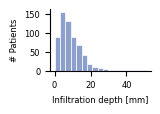

In [21]:
infiltration = patho.infiltration_depth_in_mm
bins = np.arange(infiltration.min(), infiltration.max()+1, 3)

plt.figure(figsize=(1.3,0.8))
plt.hist(infiltration, bins=bins, edgecolor="white", color=sns.color_palette("Set2")[2], linewidth=0.5)
plt.yticks([0,50,100,150])
sns.despine()
plt.xlabel("Infiltration depth [mm]", fontsize=6)
plt.ylabel("# Patients", fontsize=6)
plt.show()

### Tumor resection margin

In [22]:
margin_r = patho[["closest_resection_margin_in_cm"]].copy()

In [23]:
margin_r["grouped"] = margin_r.closest_resection_margin_in_cm.replace({
    "<0.1": "]0, 0.1[",
    "0.1": "[0.1, 0.4]", "0.2": "[0.1, 0.4]", "0.3": "[0.1, 0.4]", "0.4": "[0.1, 0.4]",
    "0.5": "> 0.4", "0.6": "> 0.4", "0.7": "> 0.4", "0.8": "> 0.4", "0.9": "> 0.4", "1": "> 0.4", "1.1": "> 0.4", "1.2": "> 0.4", "1.3": "> 0.4", 
})
margin_grouped = margin_r.grouped.value_counts()

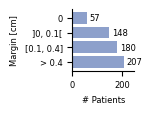

In [24]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(margin_grouped.index, margin_grouped.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
plt.xlim([0,250])
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Margin [cm]", fontsize=6)
plt.show()

## Blood data

In [25]:
# Print available units
for s in sorted(list([u for u in blood.unit.unique() if u is not None])):
    print(s,",")

% ,
fl ,
g/dl ,
mg/dl ,
mg/l ,
ml/min ,
mmol/l ,
pg ,
s ,
x10^3/µl ,
x10^6/µl ,


In [26]:
# Get available parameters
analytes = pd.DataFrame(blood[["analyte_name", "LOINC_name", "LOINC_code"]].value_counts())
analytes = analytes.sort_values(by="analyte_name").reset_index()
analytes

,analyte_name,LOINC_name,LOINC_code,count
0,Basophils,Basophils [#/volume] in Blood,26444-0,640
1,Basophils %,Basophils/100 leukocytes in Blood,30180-4,642
2,CRP,C reactive protein [Mass/volume] in Serum or P...,1988-5,93
3,Calcium,Calcium [Moles/volume] in Serum or Plasma,2000-8,682
4,Chloride,Chloride [Moles/volume] in Serum or Plasma,2075-0,462
5,Creatinine,Creatinine [Mass/volume] in Serum or Plasma,2160-0,684
6,Eosinophils,Eosinophils [#/volume] in Blood,26449-9,640
7,Eosinophils %,Eosinophils/100 leukocytes in Blood,26450-7,642
8,Erythrocytes,Erythrocytes [#/volume] in Blood,26453-1,684
9,Glomerular filtration rate,Glomerular filtration rate/1.73 sq M.predicted...,33914-3,646


In [27]:
ref.style.highlight_null("yellow")

,group,analyte_name,unit,normal_male_min,normal_male_max,normal_female_min,normal_female_max
0,Hematology,Leukocytes,x10^3/µl,4.000000,11.500000,4.000000,11.000000
1,Hematology,Hemoglobin,g/dl,14.000000,17.000000,11.800000,15.500000
2,Hematology,Platelets,x10^3/µl,160.000000,400.000000,160.000000,400.000000
3,Hematology,Erythrocytes,x10^6/µl,4.400000,5.600000,3.900000,5.200000
4,Hematology,Hematocrit,%,40.000000,50.000000,35.000000,46.000000
5,Hematology,MCH,pg,27.000000,32.000000,26.000000,33.000000
6,Hematology,MCV,fl,82.000000,96.000000,81.000000,98.000000
7,Hematology,MHCH,g/dl,32.000000,35.000000,32.000000,36.000000
8,Hematology,RDW,%,12.000000,14.300000,11.600000,16.200000
9,Hematology,MPV,fl,9.000000,12.000000,7.800000,11.000000


In [28]:
def categorize(x):
    if pd.isnull(x[f"normal_{x.sex}_min"]) or pd.isnull(x[f"normal_{x.sex}_max"]):
        return "not available"
    elif x["value"] < x[f"normal_{x.sex}_min"]:
        return "low"
    elif x["value"] > x[f"normal_{x.sex}_max"]:
        return "high"
    else:
        return "normal"

In [29]:
# find normal values and gender for each patient, merge in df
df = pd.merge(blood, clinical, on="patient_id", how="left")
df = pd.merge(df, ref, on="analyte_name", how="left")
df["normal"] = df.apply(categorize, axis=1)

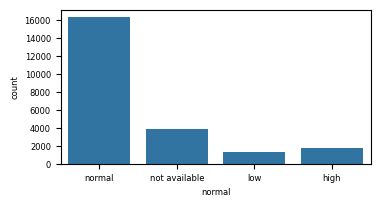

In [30]:
plt.figure(figsize=(4, 2))
sns.countplot(df, x="normal")
plt.show()

In [31]:
count = df.groupby(["analyte_name", "normal"])["normal"].count().unstack(fill_value=0)
count = count.reset_index().rename_axis(None, axis=1)
count = count[["analyte_name", "normal", "low", "high", "not available"]]

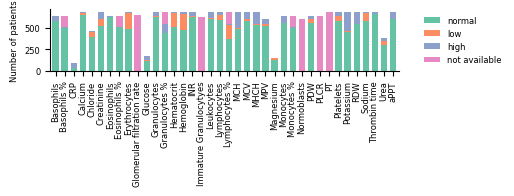

In [32]:
palette = [sns.color_palette('Set2')[1], sns.color_palette('Set2')[2], sns.color_palette('Set2')[0], sns.color_palette('Set2')[3]]
ax = count.plot.bar(stacked=True, figsize=(4.5, 0.8), color=sns.color_palette('Set2'), width=0.7, edgecolor="black", linewidth=0)
ax.set_xticks(count.index, count.analyte_name)
plt.ylabel("Number of patients", fontsize=6)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
sns.despine()
plt.show()